In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib import font_manager
import numpy as np

In [2]:
#read in data
df = pd.read_excel("US life at war.xlsx")

df["perc"] = (df["% of your life the US has been at war"]*100).astype(int)

war_dict = {1914: "World War 1",1915: "World War 1",1916: "World War 1",1917: "World War 1", 1918: "World War 1",
           1939: "World War 2", 1940: "World War 2", 1941: "World War 2", 1942: "World War 2", 1943: "World War 2",
           1944: "World War 2",1945: "World War 2", 
            1950: "Korean War", 1951: "Korean War", 1952: "Korean War", 1953: "Korean War",
           1955: "Vietnam War", 1956:"Vietnam War", 1957: "Vietnam War", 1958: "Vietnam War", 1959:"Vietnam War", 
          1960: "Vietnam War",1961: "Vietnam War",1962: "Vietnam War",1963: "Vietnam War",1964: "Vietnam War",
           1965: "Vietnam War",1966: "Vietnam War",1967: "Vietnam War",1968: "Vietnam War",1969: "Vietnam War",
           1970: "Vietnam War",1971: "Vietnam War",1972: "Vietnam War",1973: "Vietnam War",1974: "Vietnam War",
           1973: "Vietnam War", 
           1990: "Gulf War", 1991: "Gulf War",
           2001: "Afghanistan War",2002: "Afghanistan War",2003: "Afghanistan War",2004: "Afghanistan War",
           2005: "Afghanistan War",2006: "Afghanistan War",2007: "Afghanistan War",2008: "Afghanistan War",
            2009: "Afghanistan War", 2010: "Afghanistan War",2011: "Afghanistan War",2012: "Afghanistan War",
           2013: "Afghanistan War",2014: "Afghanistan War",2015: "Afghanistan War",2016: "Afghanistan War",
           2017: "Afghanistan War",2018: "Afghanistan War",2019: "Afghanistan War",2020: "Afghanistan War"}

In [3]:
df["War name"] = df["Birth year"].map(war_dict)
df["War name"] = df["War name"].fillna("No war")
df["War"] = ["No war" if x=="No war" else "War" for x in df["War name"]]

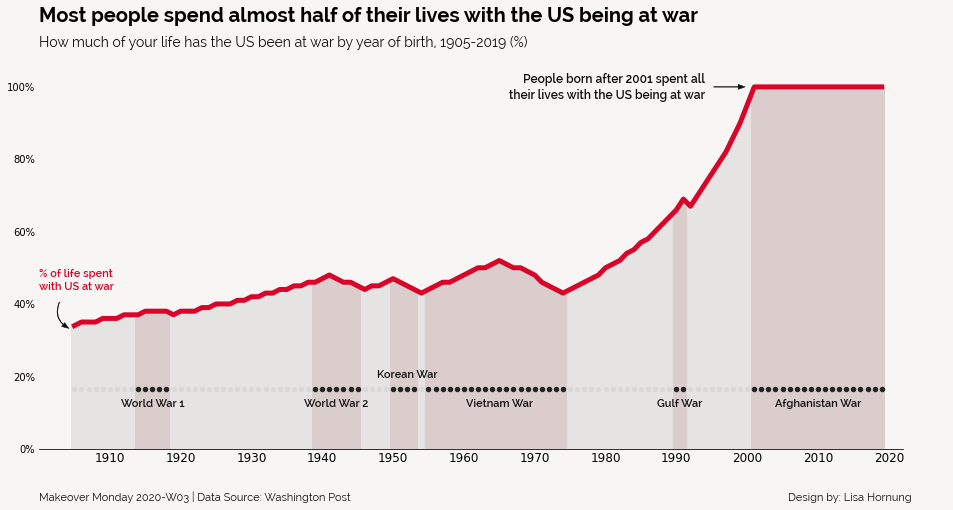

In [241]:
#define general colours, font styles and dot position
offwhite = "#f7f6f4"
light = "#d9d9d9"
dark = "#c8b3b2"

#c8b3b2
#C4AEAD"

colors = {"War": "#d90429", "No war": "#cccccc"}
bar_colors = {"War": dark, "No war": light}
dot_colors =  {"War": "#222222", "No war": light}

dot_pos = 16.5

label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Raleway-Regular.ttf')
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Raleway-Bold.ttf')
annot_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Raleway-SemiBold.ttf')

# =========
# Initialise Figure and define layout
fig, ax = plt.subplots(figsize=(12,10))
fig.set_facecolor(offwhite)

#make plot area transparent
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.9, wspace=None, hspace=None)

# ====== first plot
plt.subplot2grid(shape=(5,1), loc=(0,0), rowspan=3)

#bars with shading
for i in range(len(df)):
    plt.bar(df["Birth year"][i], df["perc"][i], color=bar_colors[df["War"][i]], width=1, zorder=2,
           edgecolor=None, linewidth=0.3, alpha=0.6)

#line on top
plt.plot(df["Birth year"],df["perc"], linewidth=5, color = colors["War"], zorder=3)


#for i in range(len)
for i in range(len(df)):
    plt.scatter(df["Birth year"][i],dot_pos,s=20, color=dot_colors[df["War"][i]], zorder=3)

    
#remove grid
for pos in ['right', 'top',  'left']:
    plt.gca().spines[pos].set_visible(False)

plt.gca().patch.set_alpha(0)     

#========
#yaxis
plt.tick_params(axis='both', length = 0, color = "#444444")
plt.tick_params(axis='y', labelsize=10)
plt.gca().set_ylim(ymin=0)
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:,.0f}%'.format(x)))


#xaxis
plt.xticks(np.arange(1910,2021,10))
plt.tick_params(axis='x', labelsize=12)
plt.gca().set_xlim(xmin=1900, xmax=2022)

# =========
# Arrows
#define style
style = "Simple, tail_width=0.5, head_width=5, head_length=7"
kw = dict(arrowstyle=style, color="#111111")

#define arrows
a1 = patches.FancyArrowPatch((1995, 100), (2000, 100),linewidth=0.5,
                            connectionstyle="arc3,rad=0", **kw)
a2 = patches.FancyArrowPatch((1903, 41), (1904.5, 33),linewidth=0.5,
                             connectionstyle="arc3,rad=.5", **kw)

#add arrows to plot
for a in [a1, a2]:
    plt.gca().add_patch(a)
    
# =======
# Add annotations
plt.text(1900,44,'% of life spent\nwith US at war',linespacing=1.3,
         fontsize = 11, weight = 'normal', fontproperties=annot_font, color=colors["War"])

plt.text(1994,100,'People born after 2001 spent all\ntheir lives with the US being at war',
         fontsize = 12, weight = 'bold', fontproperties=annot_font, color="#111111", ha="right", va="center",
        linespacing=1.3)

#war labels
y_pos = [dot_pos-5,dot_pos-5,dot_pos+3,dot_pos-5,dot_pos-5,dot_pos-5]
x_pos = [1916,1942, 1952,1965, 1990.5, 2010]
text = ["World War 1", "World War 2","Korean War","Vietnam War", "Gulf War","Afghanistan War"]

for i in range(len(text)):
    plt.text(x_pos[i], y_pos[i], text[i], fontsize=11, color="#111111", ha="center", 
            fontproperties=annot_font)

# ============
# Add title
plt.figtext(0,0.965,'Most people spend almost half of their lives with the US being at war',
         fontsize = 20, weight = 'bold', fontproperties=title_font, color='black')
plt.figtext(0,0.93, "How much of your life has the US been at war by year of birth, 1905-2019 (%)", 
            fontsize=14, ha='left',  color="#111111", fontproperties=label_font)

#footer
plt.figtext(0,0.3, "Makeover Monday 2020-W03 | Data Source: Washington Post", fontsize=11,
            ha='left', color="#111111", fontproperties=label_font)
plt.figtext(1.05,0.3, "Design by: Lisa Hornung            ",
            fontsize=11, ha='right', color="#111111", fontproperties=label_font)

# ==========
#save
plt.savefig("MakeoverMonday2020W06_US-at-war.png", bbox_inches="tight",pad_inches=0.2)


plt.show()